In [1]:
import sys, os
sys.path.append(os.path.abspath('../'))

from os import listdir
import pandas as pd
import numpy as np
from utils import find_csv_filenames
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
import seaborn as sns

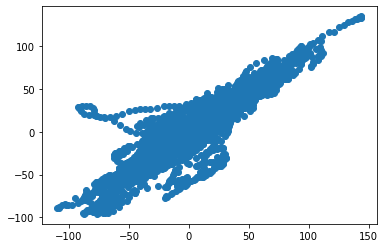

In [2]:
subject_filenames = find_csv_filenames("../../output")
name = subject_filenames[0]
df = pd.read_csv(name)

plt.scatter(x=df['F3'], y=df['FC5'])

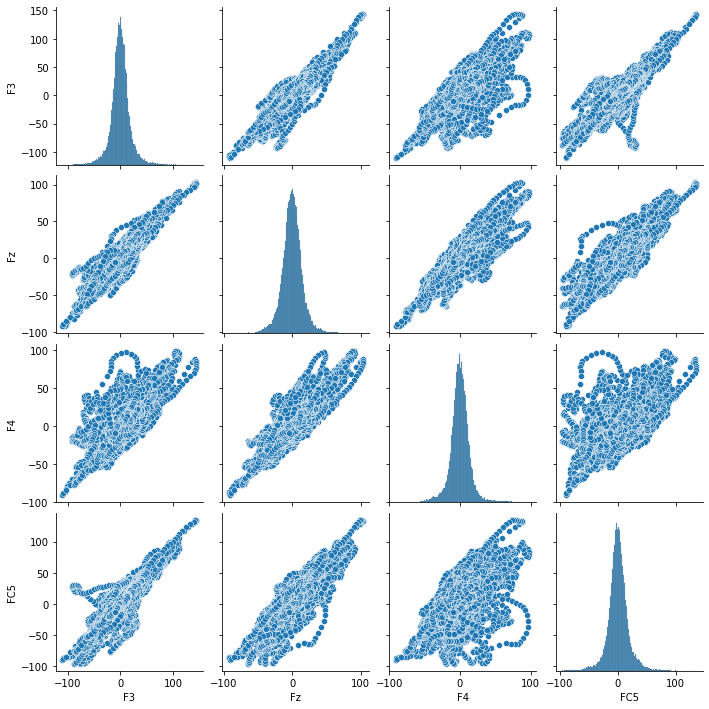

In [7]:
sns.pairplot(df.iloc[:, :4])

In [10]:
for i in range(df.shape[1]):
    df.iloc[:, i] = df.iloc[:, i] - df.iloc[:, i].mean()

cov = np.dot(df.T.to_numpy(), df.to_numpy())
print(cov)

[[ 1.37526247e+07  1.06989867e+07  7.91818472e+06  1.24505010e+07
   9.61260119e+06  7.78797626e+06  3.40779814e+06  1.24332463e+07
   9.44740883e+06  5.46329613e+06  6.99864654e+06  3.39114634e+06
   7.82652175e+06  6.82926996e+06  5.69262761e+06  3.01120401e+06
   4.41484611e+03]
 [ 1.06989867e+07  9.82911726e+06  7.91903320e+06  9.36971391e+06
   8.34497479e+06  7.59749810e+06  3.89532889e+06  9.34968072e+06
   8.06969564e+06  5.49554433e+06  6.50133429e+06  3.87768742e+06
   5.78230325e+06  5.78119039e+06  5.26515424e+06  2.96595632e+06
   3.95711230e+03]
 [ 7.91818472e+06  7.91903320e+06  8.23589460e+06  6.25610306e+06
   6.06744251e+06  6.38871547e+06  4.84527916e+06  6.22291792e+06
   5.77846816e+06  5.04790648e+06  4.89217955e+06  4.83000007e+06
   3.50341190e+06  3.99271564e+06  4.03607031e+06  2.59102989e+06
   2.37535757e+03]
 [ 1.24505010e+07  9.36971391e+06  6.25610306e+06  1.31418417e+07
   8.88491311e+06  6.65331304e+06  2.30153321e+06  1.31173679e+07
   8.85922496e+06  

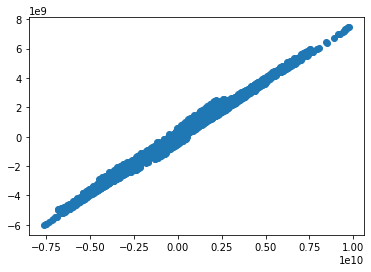

In [11]:
trans_data = pd.DataFrame(np.dot(cov, df.T)).T

plt.scatter(x=trans_data.iloc[:, 1], y=trans_data.iloc[:, 2])

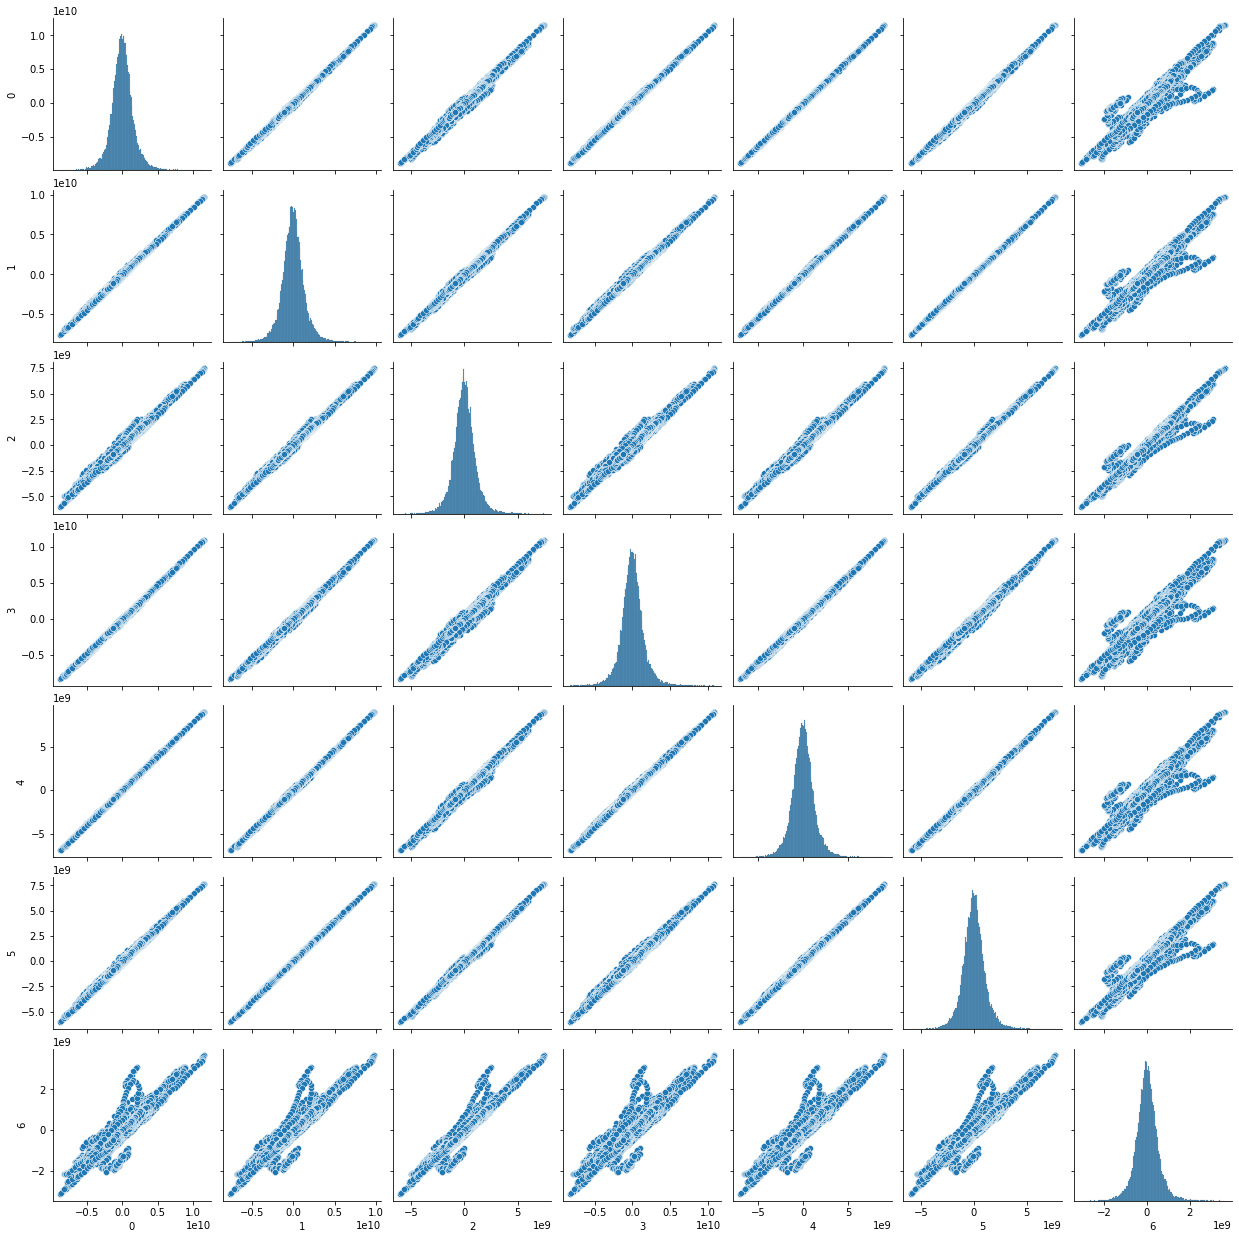

In [13]:
sns.pairplot(trans_data.iloc[:, :7])

In [52]:
pca = PCA(n_components=5)
reduct_data = pca.fit_transform(df)

print(reduct_data.shape)

(80000, 5)


In [9]:
split_data = df.iloc[:100, :10]
u, s, v = np.linalg.svd(split_data)

In [10]:
print(u.shape)
print(s.shape)
print(v.shape)

(100, 100)
(10,)
(10, 10)


In [25]:
ica = FastICA(n_components=6, random_state=23)
x_transformed = ica.fit_transform(df)

In [26]:
print(x_transformed.shape)

(40040, 6)
